# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [33]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [34]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Std' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split  \
0  04 FG04-A1-4-start-r1_CRR_DiadFit.txt           1.0    104.589035   
1              05 FG04-A1-4-start-r2.txt           0.0    104.600034   
2              06 FG04-A1-4-start-r3.txt           0.0    104.561540   
3    37 FG04-A1-4-end-r4_CRR_DiadFit.txt           1.0    104.578037   
4                38 FG04-A1-4-end-r5.txt           0.0    104.550541   
5    39 FG04-A1-4-end-r6_CRR_DiadFit.txt           1.0    104.550541   

     Diad1_pos    Diad2_pos     HB1_pos      HB2_pos      C13_pos  \
0  1282.816643  1387.405679         NaN  1409.000986          NaN   
1  1282.783648  1387.383682         NaN  1408.720527          NaN   
2  1282.827642  1387.389181         NaN          NaN          NaN   
3  1282.827642  1387.405679         NaN  1409.154963          NaN   
4  1282.816643  1387.367184  1262.75011  1408.682033  1369.703796   
5  1282.800146  1387.350687         NaN  1408.610543  1367.245660   

   Diad1_abs_prom  Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  \
0      474.668999      946.634385  ...  733.351215         NaN   1166.969017   
1      518.956412     1048.178291  ...  735.381113         NaN   1206.656424   
2      313.086420      635.908591  ...         NaN         NaN   1004.586420   
3      415.408431      857.052418  ...  738.004664         NaN   1109.908431   
4      618.298731     1234.505209  ...  766.857374  740.484475   1322.098719   
5      628.935640     1233.343618  ...  758.062014  790.221337   1325.235628   

   HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0         NaN        692.300018        692.550003                     NaN   
1         NaN        687.700012        687.949997                     NaN   
2         NaN        691.500000        691.700012                     NaN   
3         NaN        694.500000        696.600006                     NaN   
4   738.70464        703.799988        708.299988                2.496623   
5         NaN        696.299988        699.150009                0.693123   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               1.009518                        NaN                  25.938786  
1               1.007842                        NaN                  24.043398  
2                    NaN                        NaN                        NaN  
3               1.008338                        NaN                  19.816797  
4               1.004782                  21.266993                  31.683170  
5               1.012561                        NaN                  35.877168  

[6 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [35]:
Diad_Files =GroupN_df['filename']
i=4


### Lets plot the diad to have a look at it

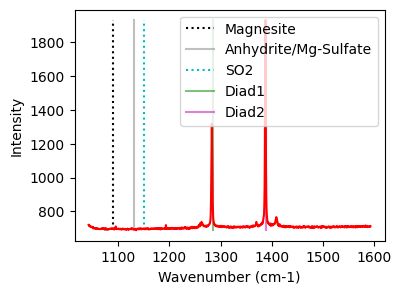

In [36]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [37]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [38]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=618.2987310659191, HB_prom=39.10466422731031, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1282.815561       1282.815611        0.004489       1336.892703   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma     HB1_Cent    HB1_Area  HB1_Sigma  \
0           0.976002                  0  1262.535618  200.402405   2.923283   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0             474.460898        2.363148         0.81674    1.952003   

         Diad1_refit  Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.015517      1.026862                    0.03029   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.004114  PseudoVoigtModel

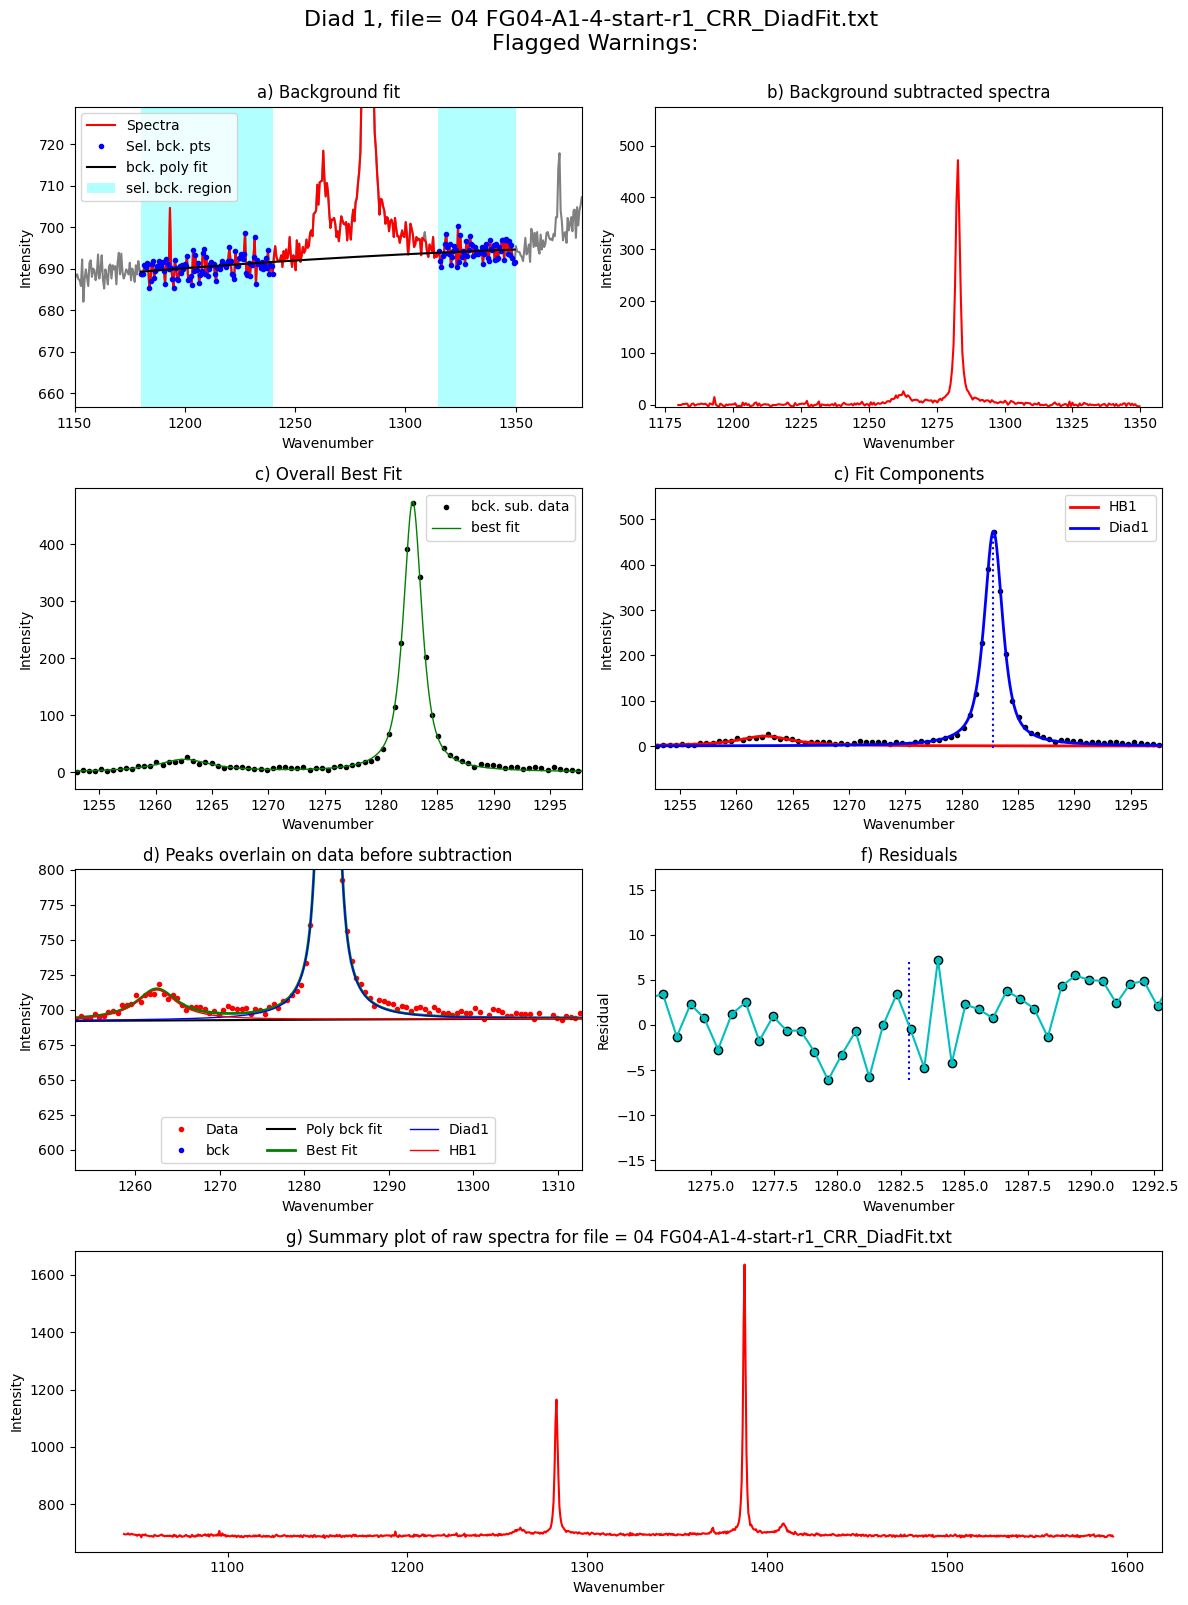

In [39]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [40]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [41]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=True, gauss_amp=116.51479739818092, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1234.5052087152444, HB_prom=58.25739869909046, C13_prom=23.334481139138802, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

refit attempt 1


Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.342523       1387.342573        0.001922       2809.373763   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.807847                  0  1408.736859  319.504125   1.975714   

   Diad2_Combofit_Height  ...  Diad2_fwhm  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0            1244.979591  ...    1.615695       1384.782037        417.486833   

   Diad2_Gauss_Sigma        Diad2_refit  Diad2_Asym50 Diad2_Asym70  \
0          18.806262  Flagged Warnings:      1.061702     1.026432   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                   0.099692              0.001298  PseudoVoigtModel  

[1 rows x 22 columns]

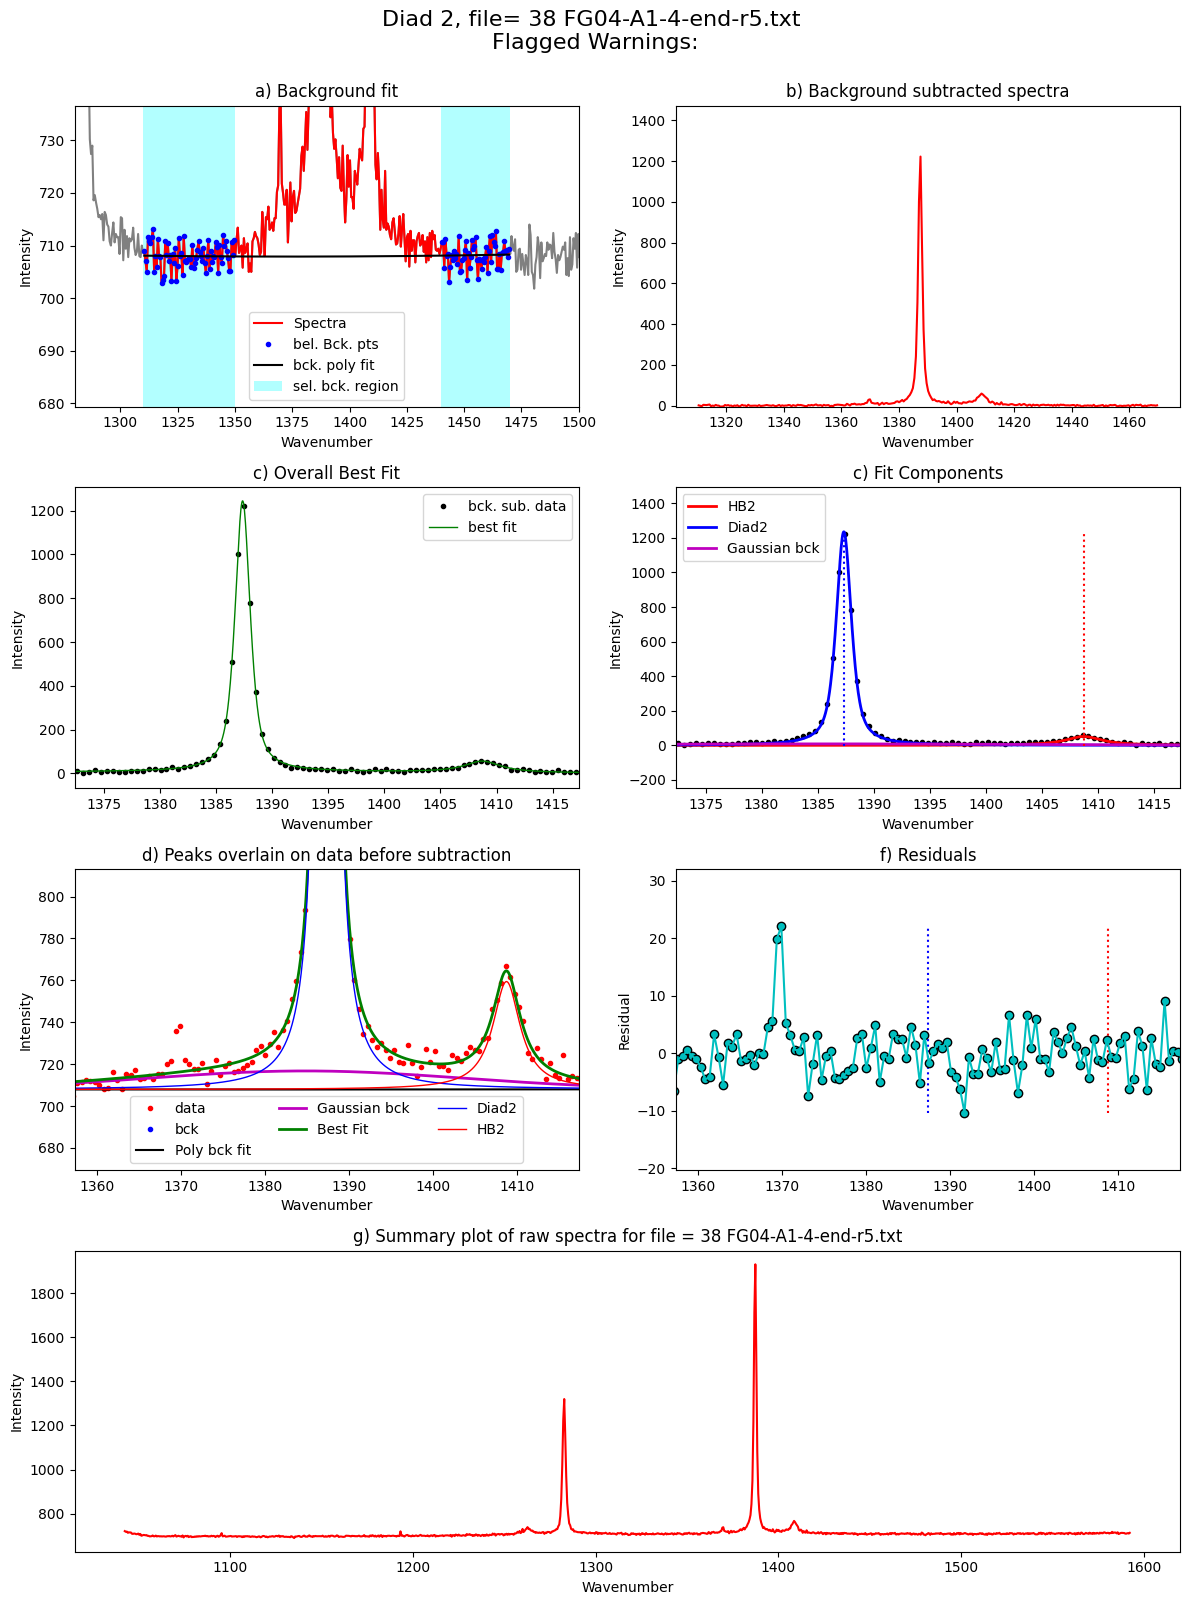

In [42]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/6 [00:00<?, ?it/s]

Processing file: 04 FG04-A1-4-start-r1_CRR_DiadFit.txt


 17%|█▋        | 1/6 [00:02<00:10,  2.19s/it]

Processing file: 05 FG04-A1-4-start-r2.txt


 33%|███▎      | 2/6 [00:04<00:08,  2.20s/it]

Processing file: 06 FG04-A1-4-start-r3.txt


 50%|█████     | 3/6 [00:06<00:06,  2.15s/it]

Processing file: 37 FG04-A1-4-end-r4_CRR_DiadFit.txt


 67%|██████▋   | 4/6 [00:08<00:04,  2.14s/it]

Processing file: 38 FG04-A1-4-end-r5.txt


 83%|████████▎ | 5/6 [00:13<00:03,  3.15s/it]

Processing file: 39 FG04-A1-4-end-r6_CRR_DiadFit.txt


100%|██████████| 6/6 [00:20<00:00,  3.36s/it]


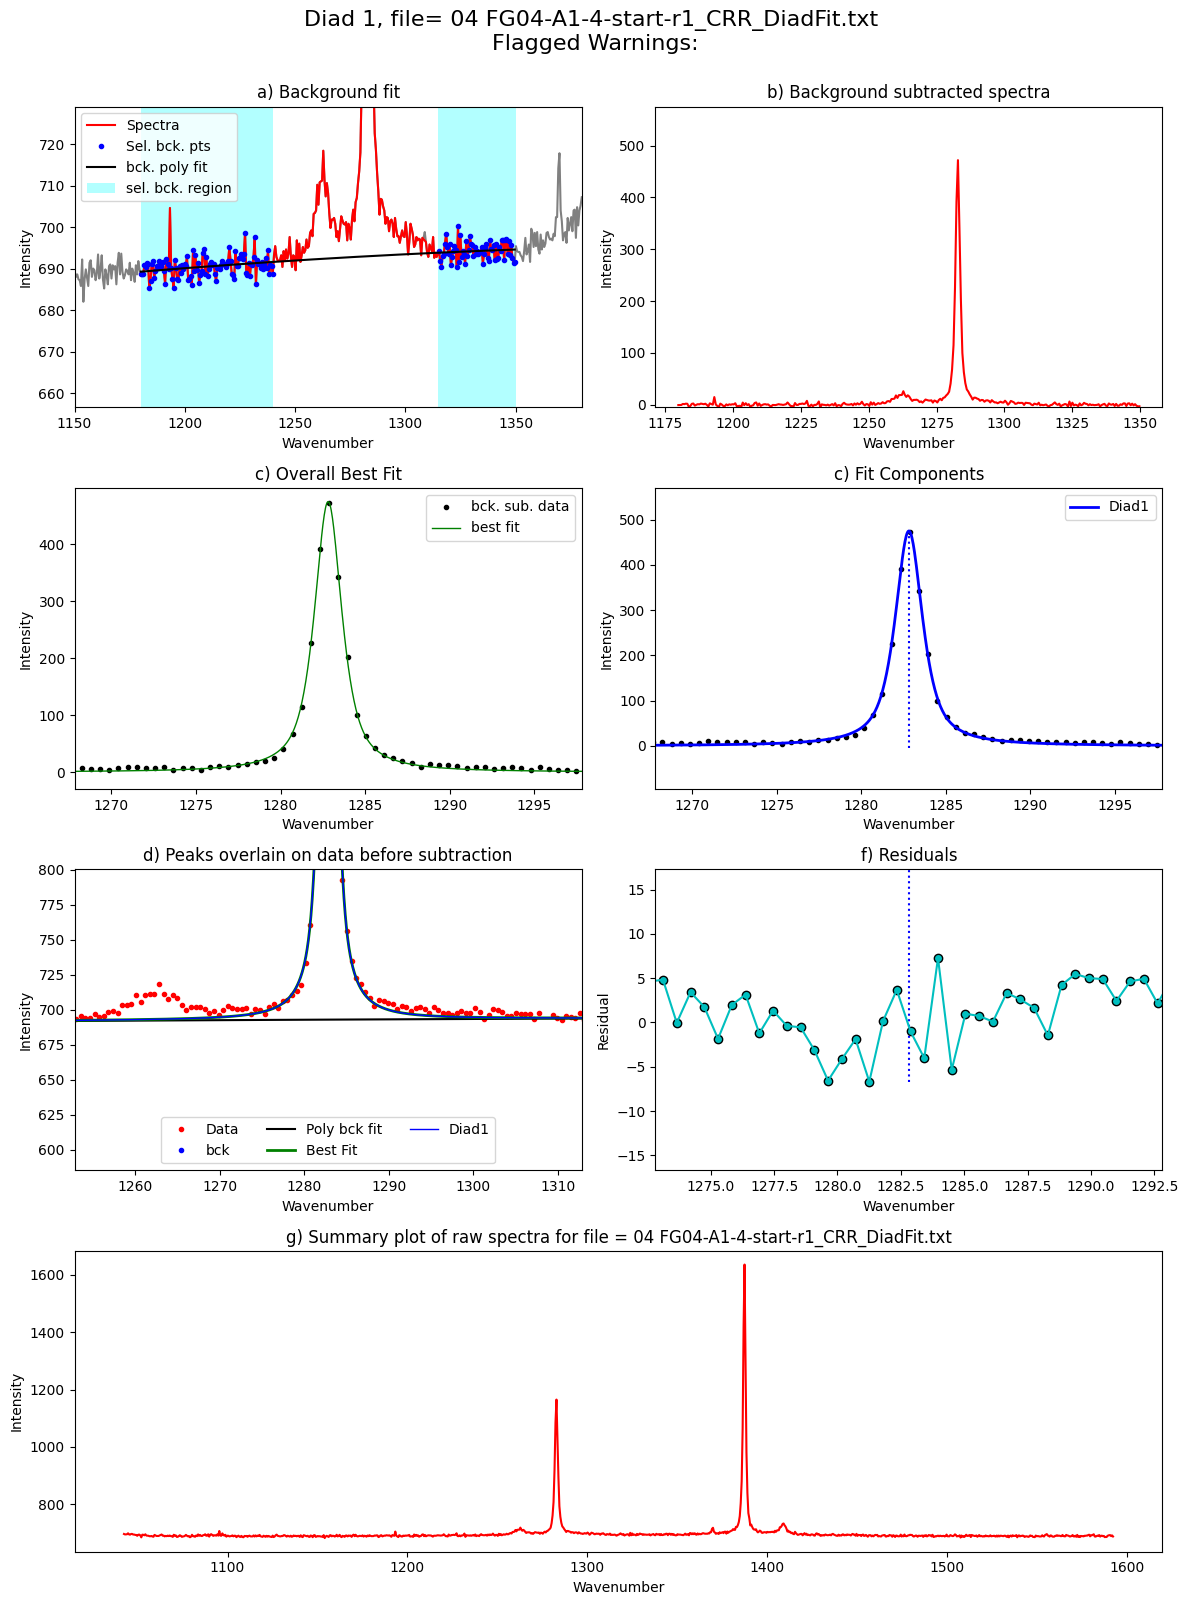

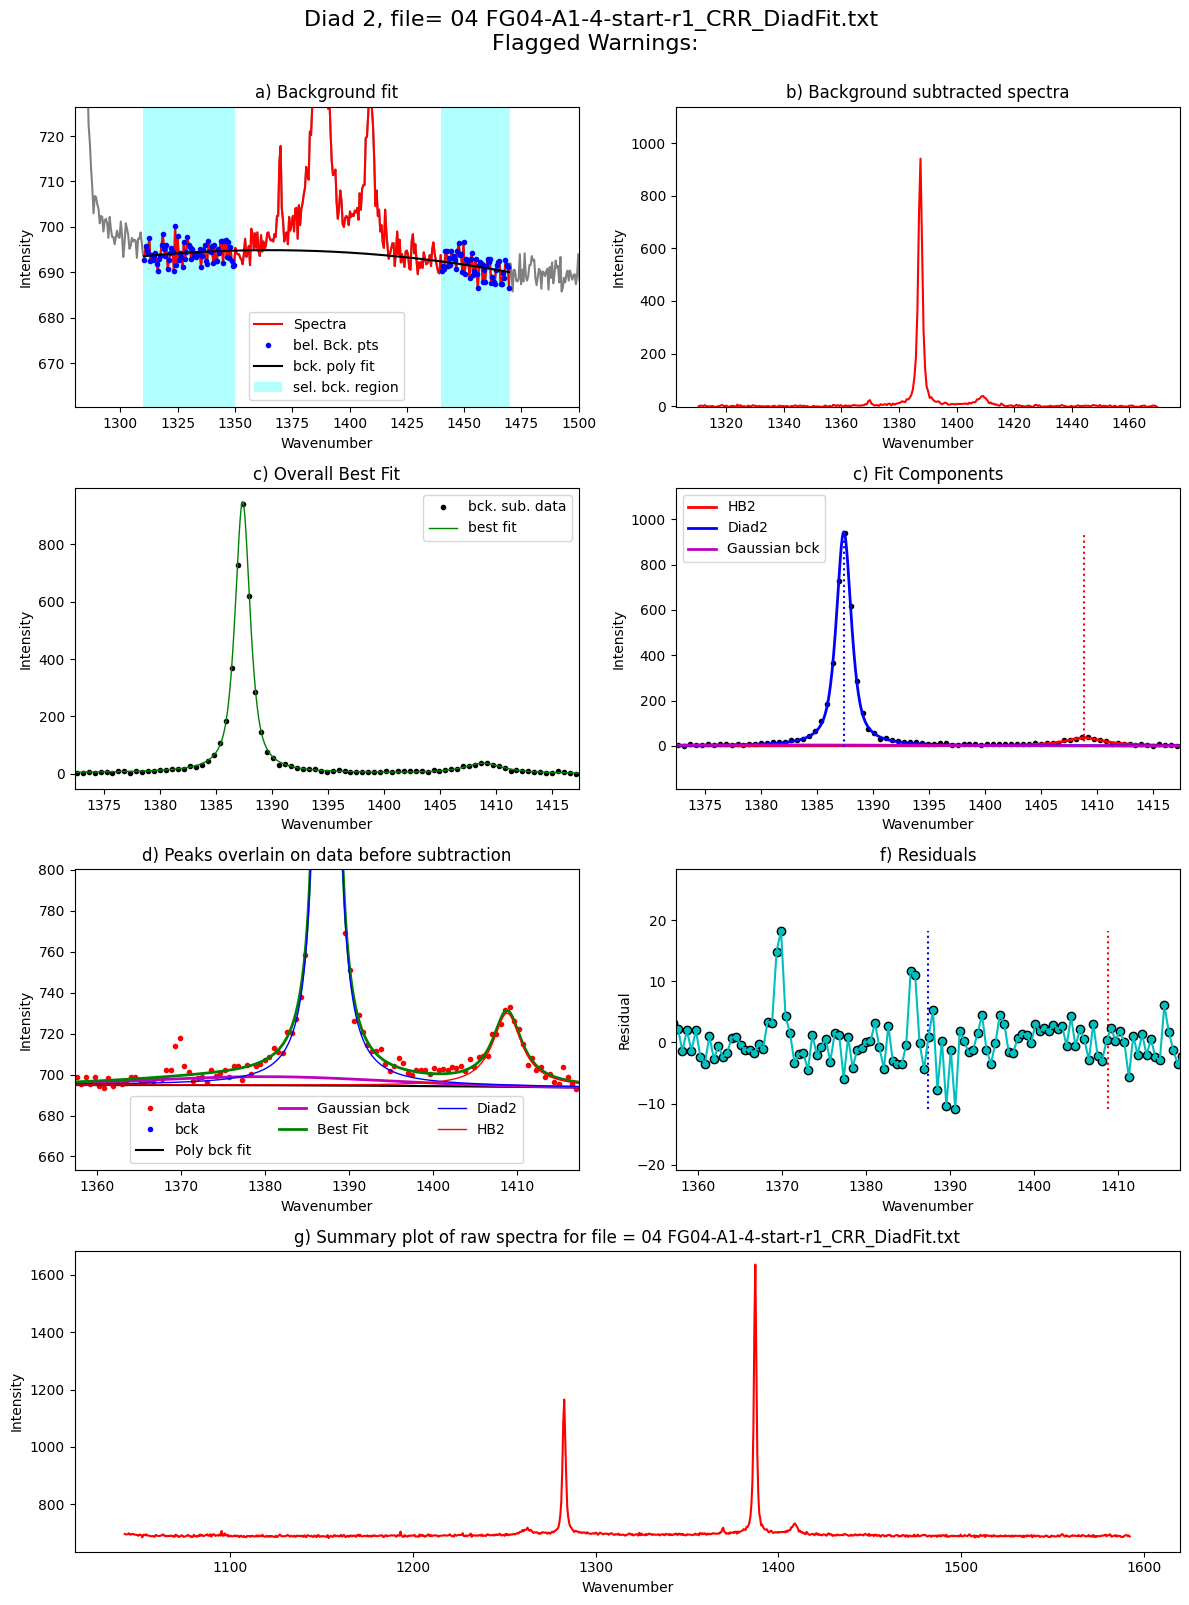

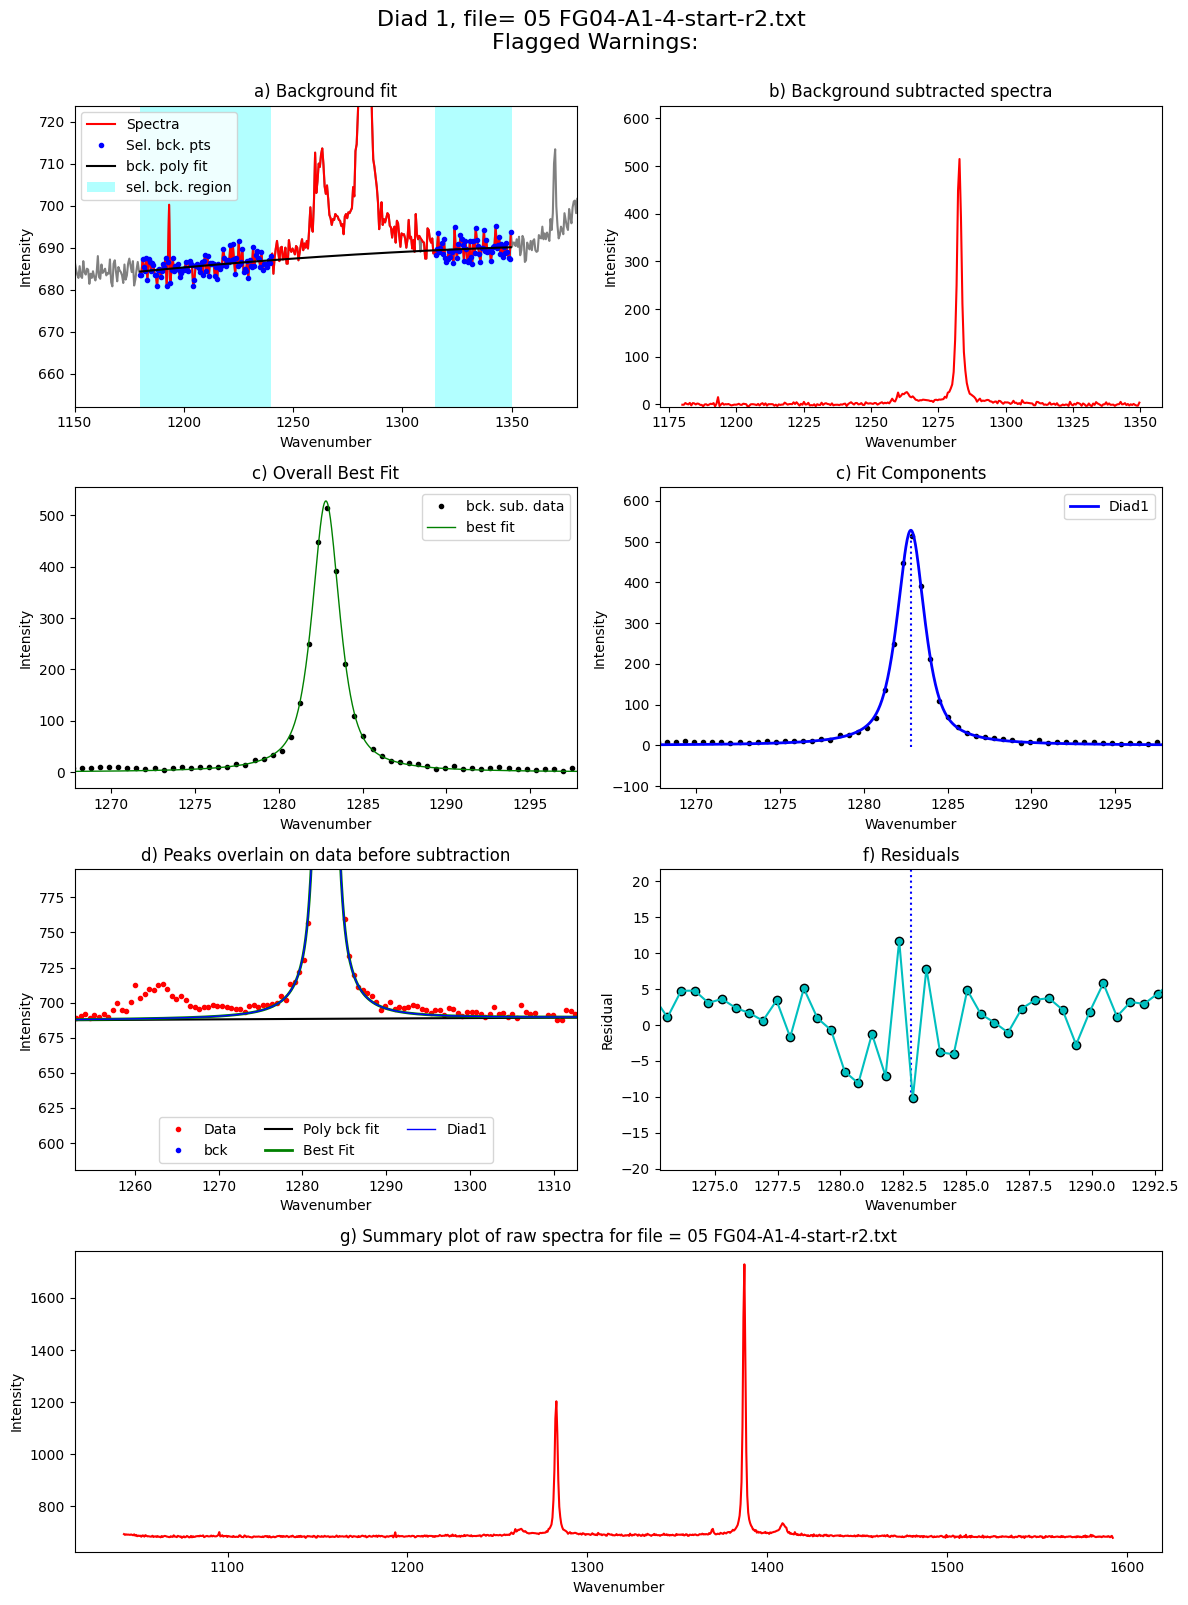

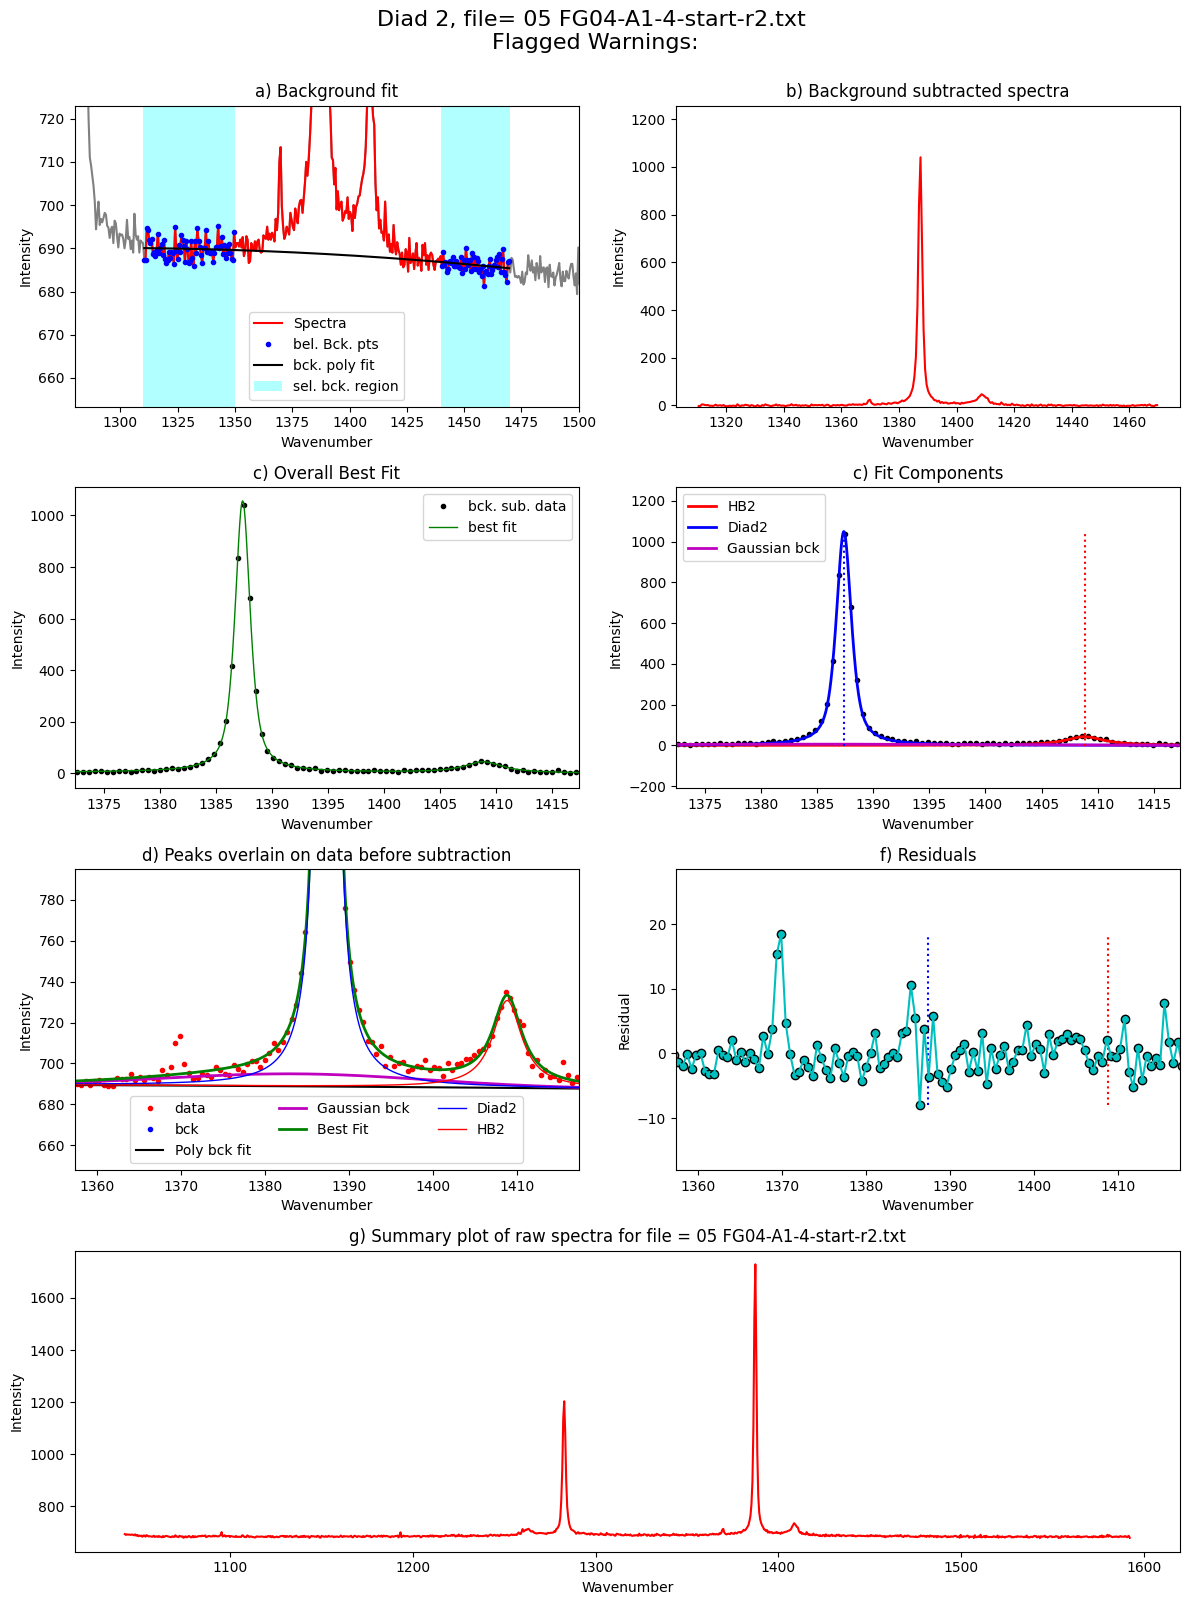

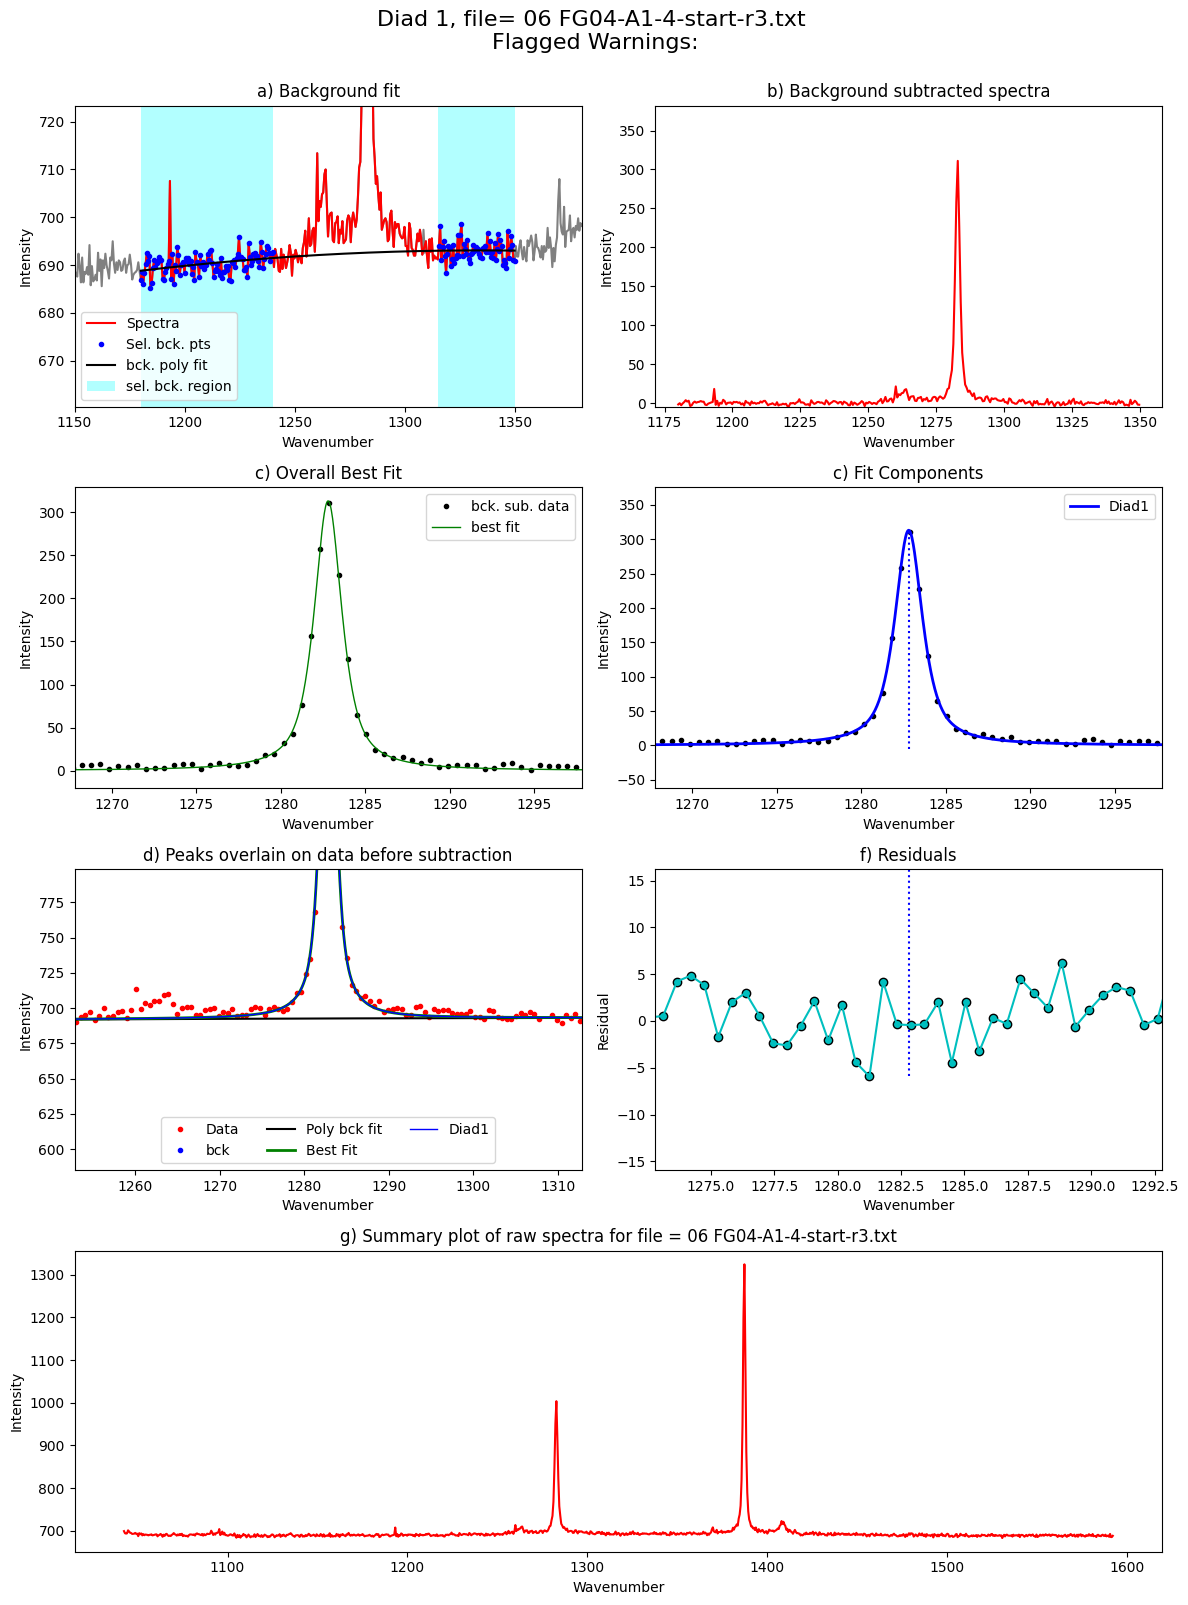

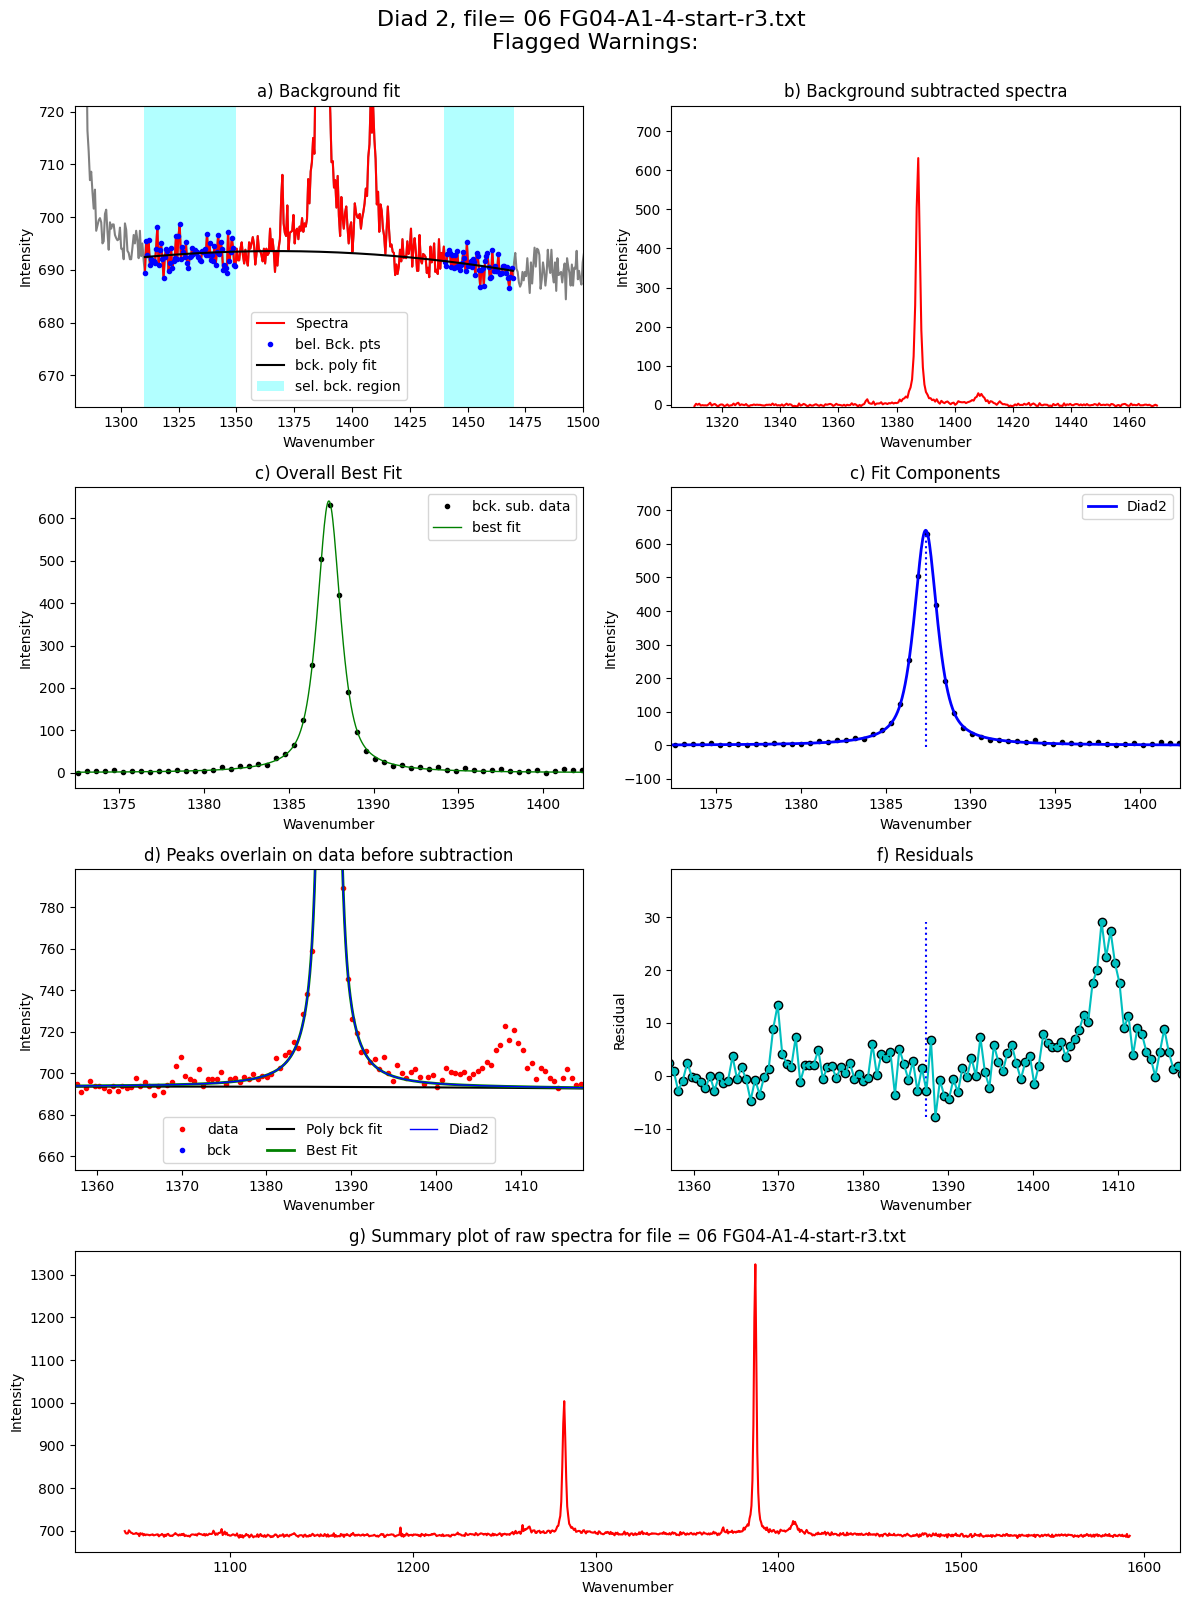

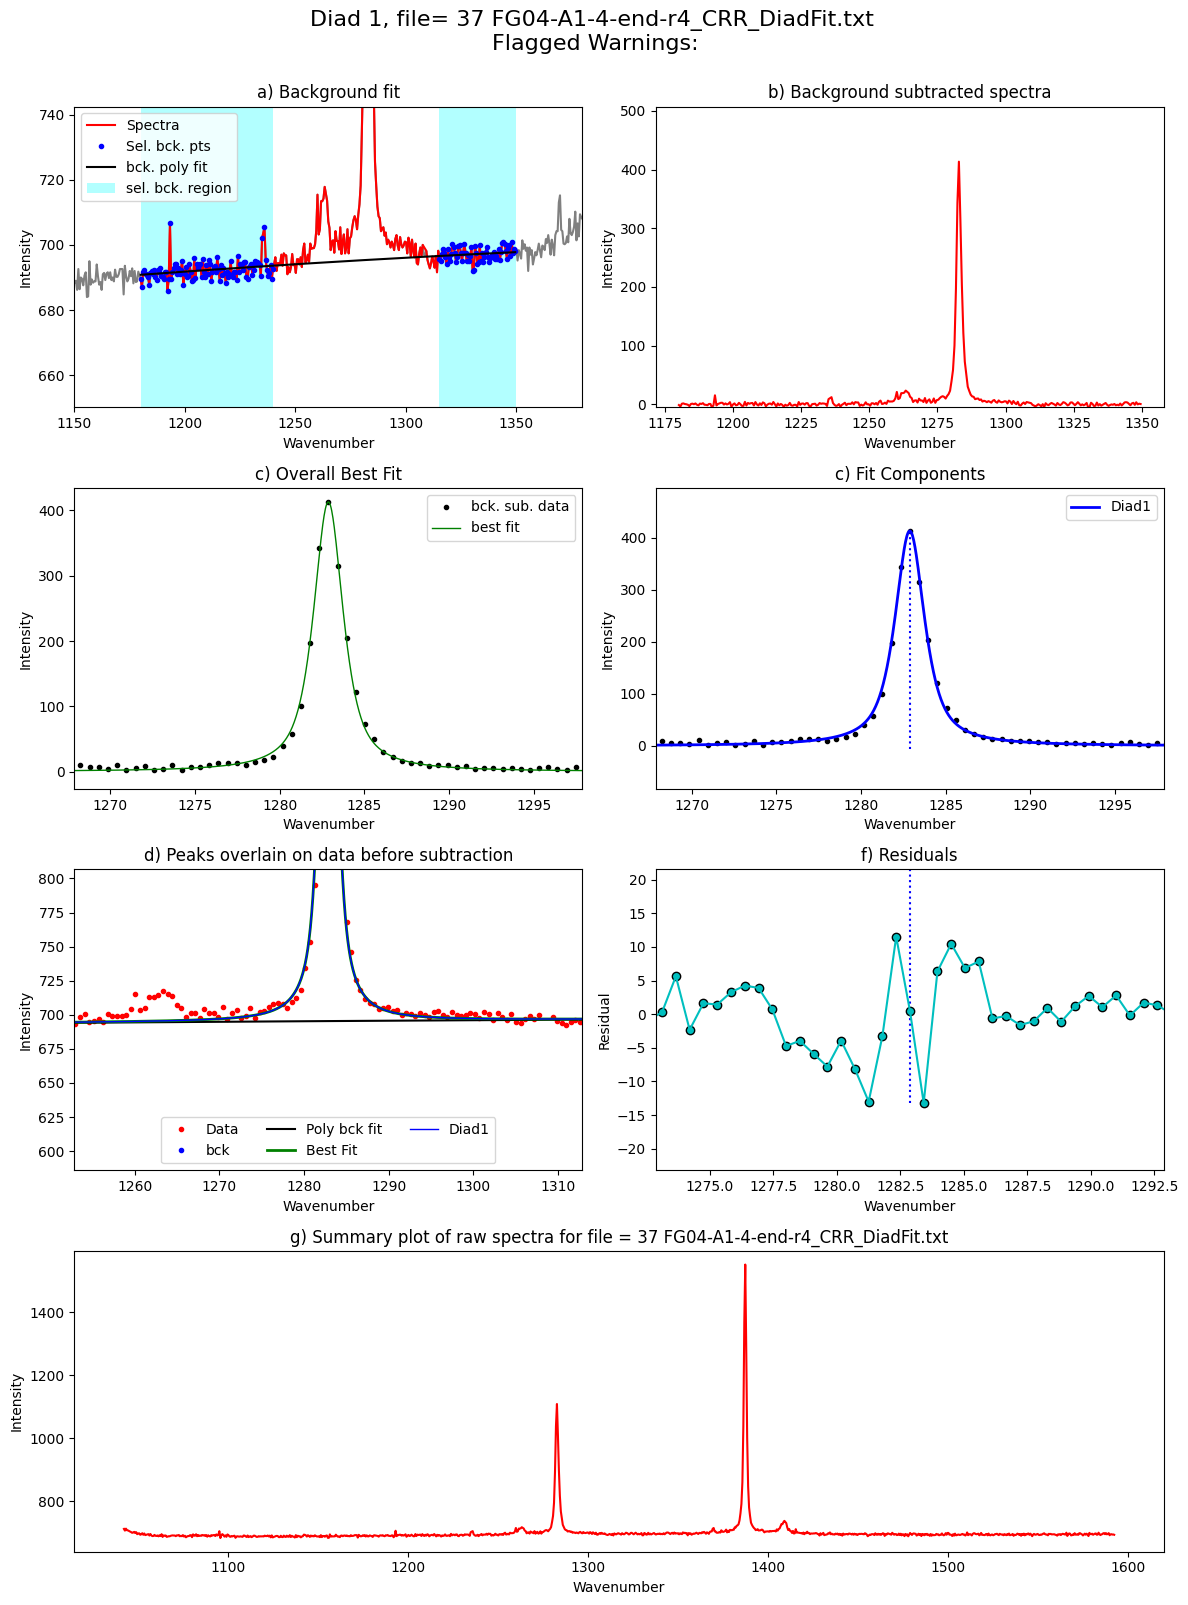

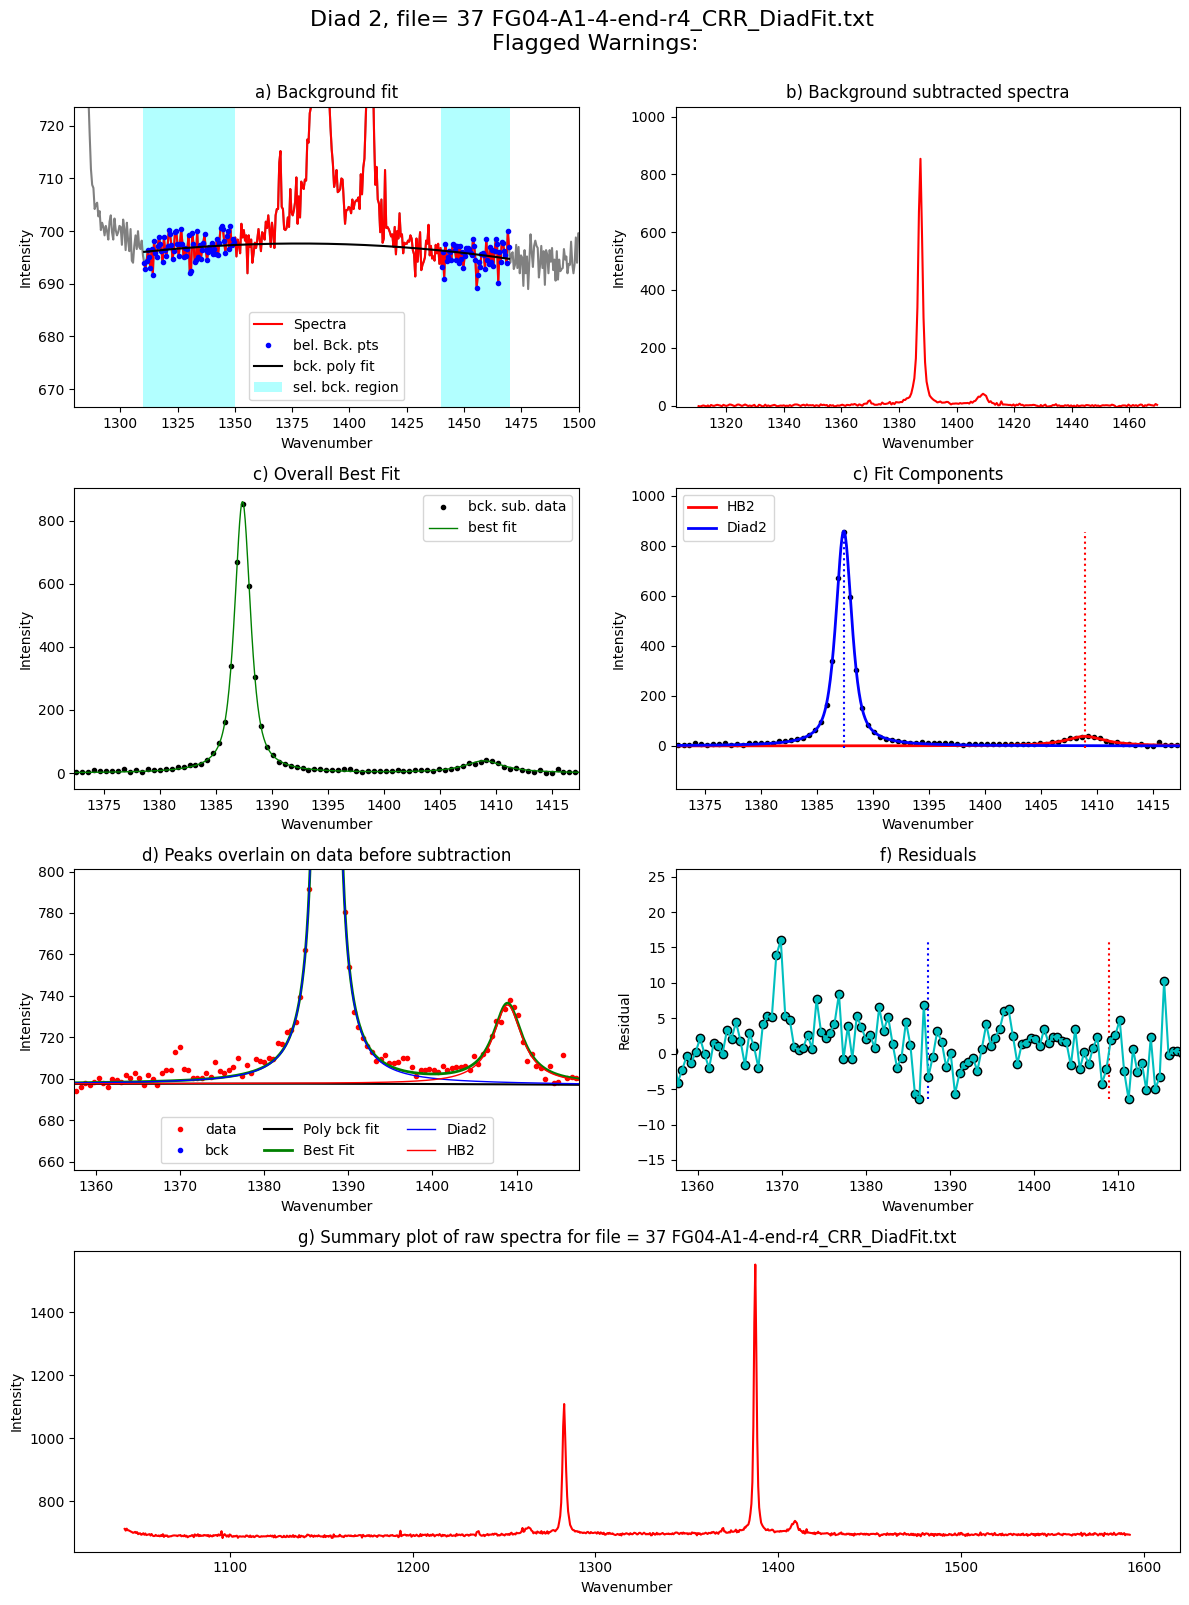

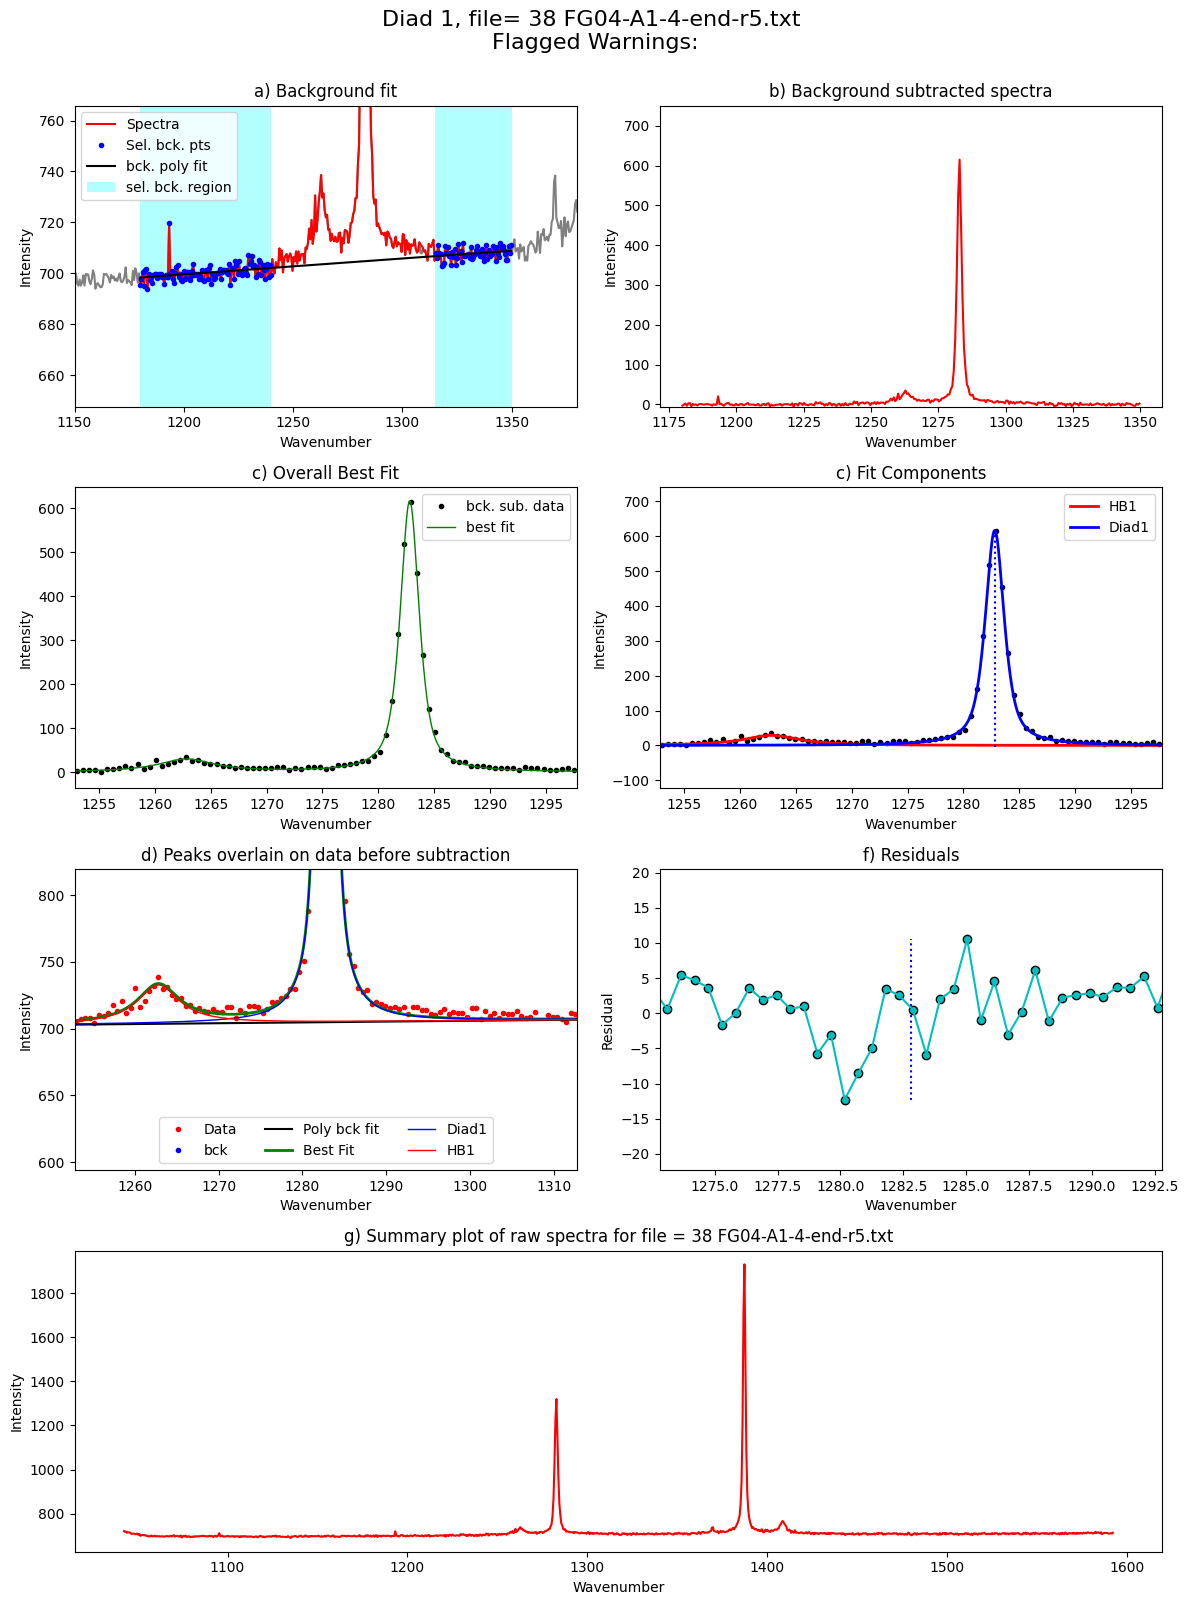

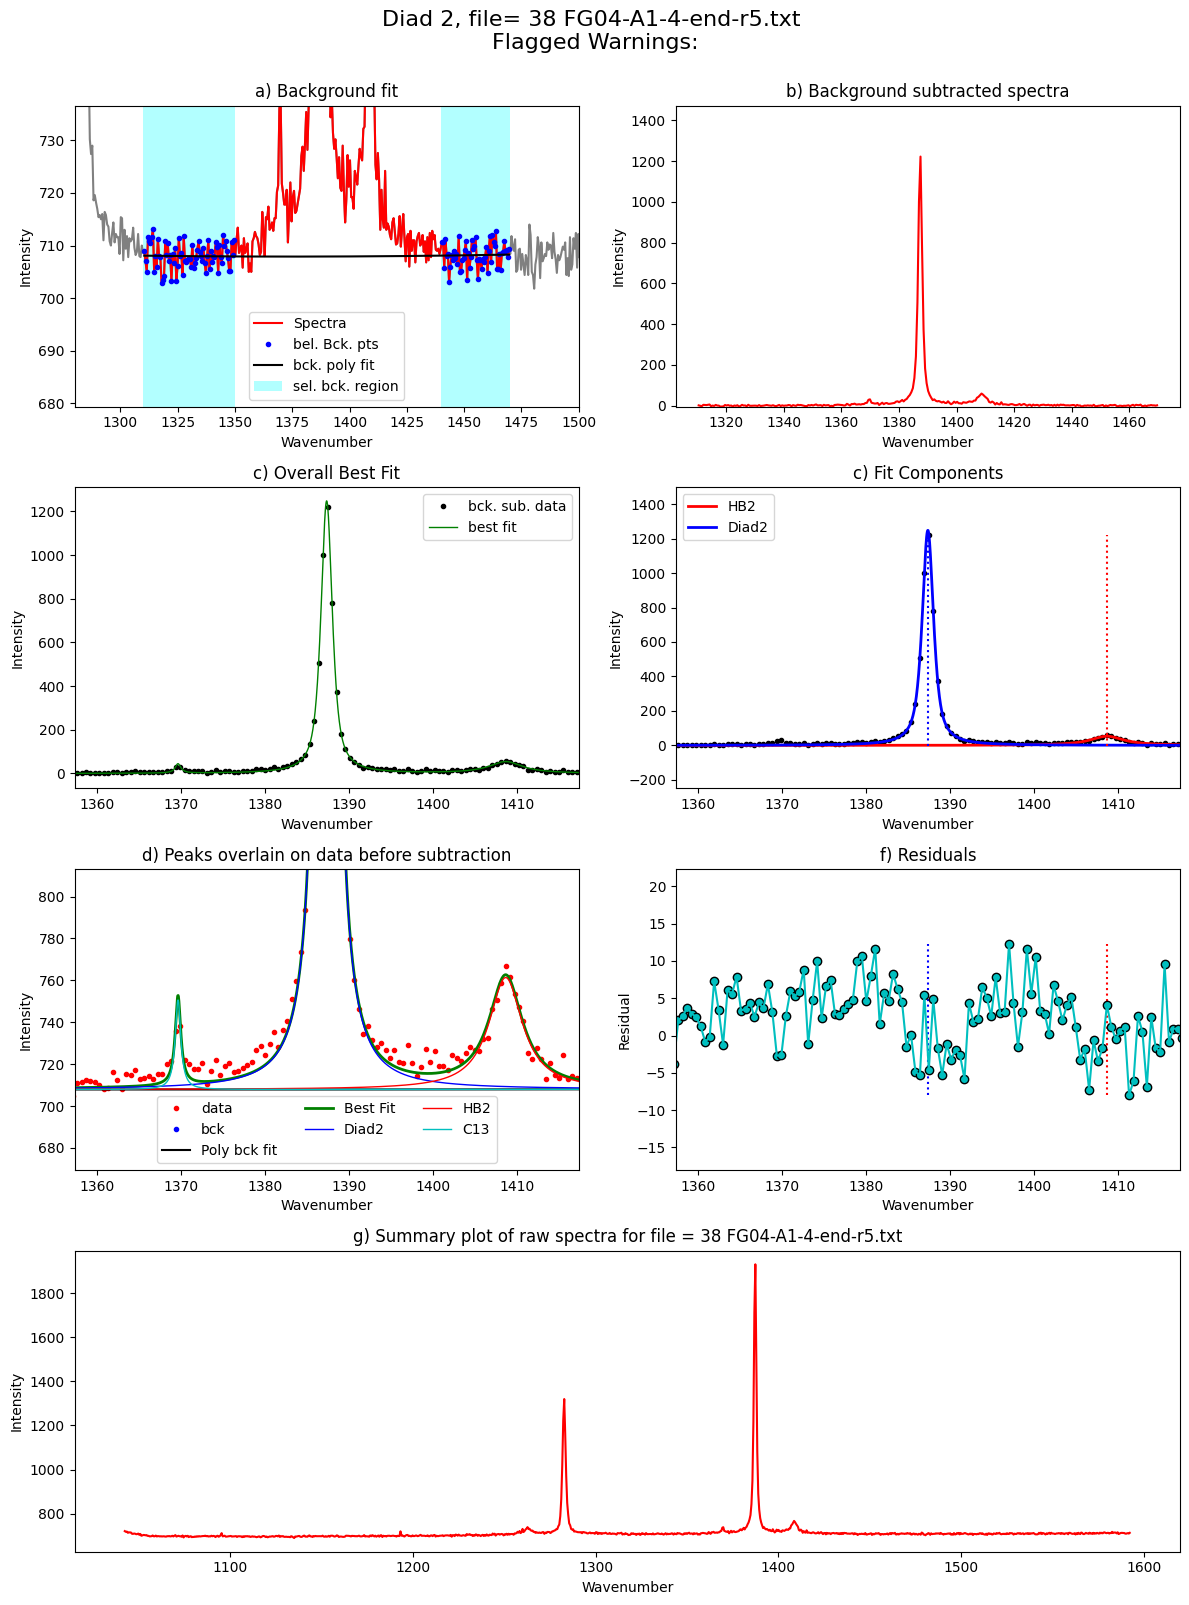

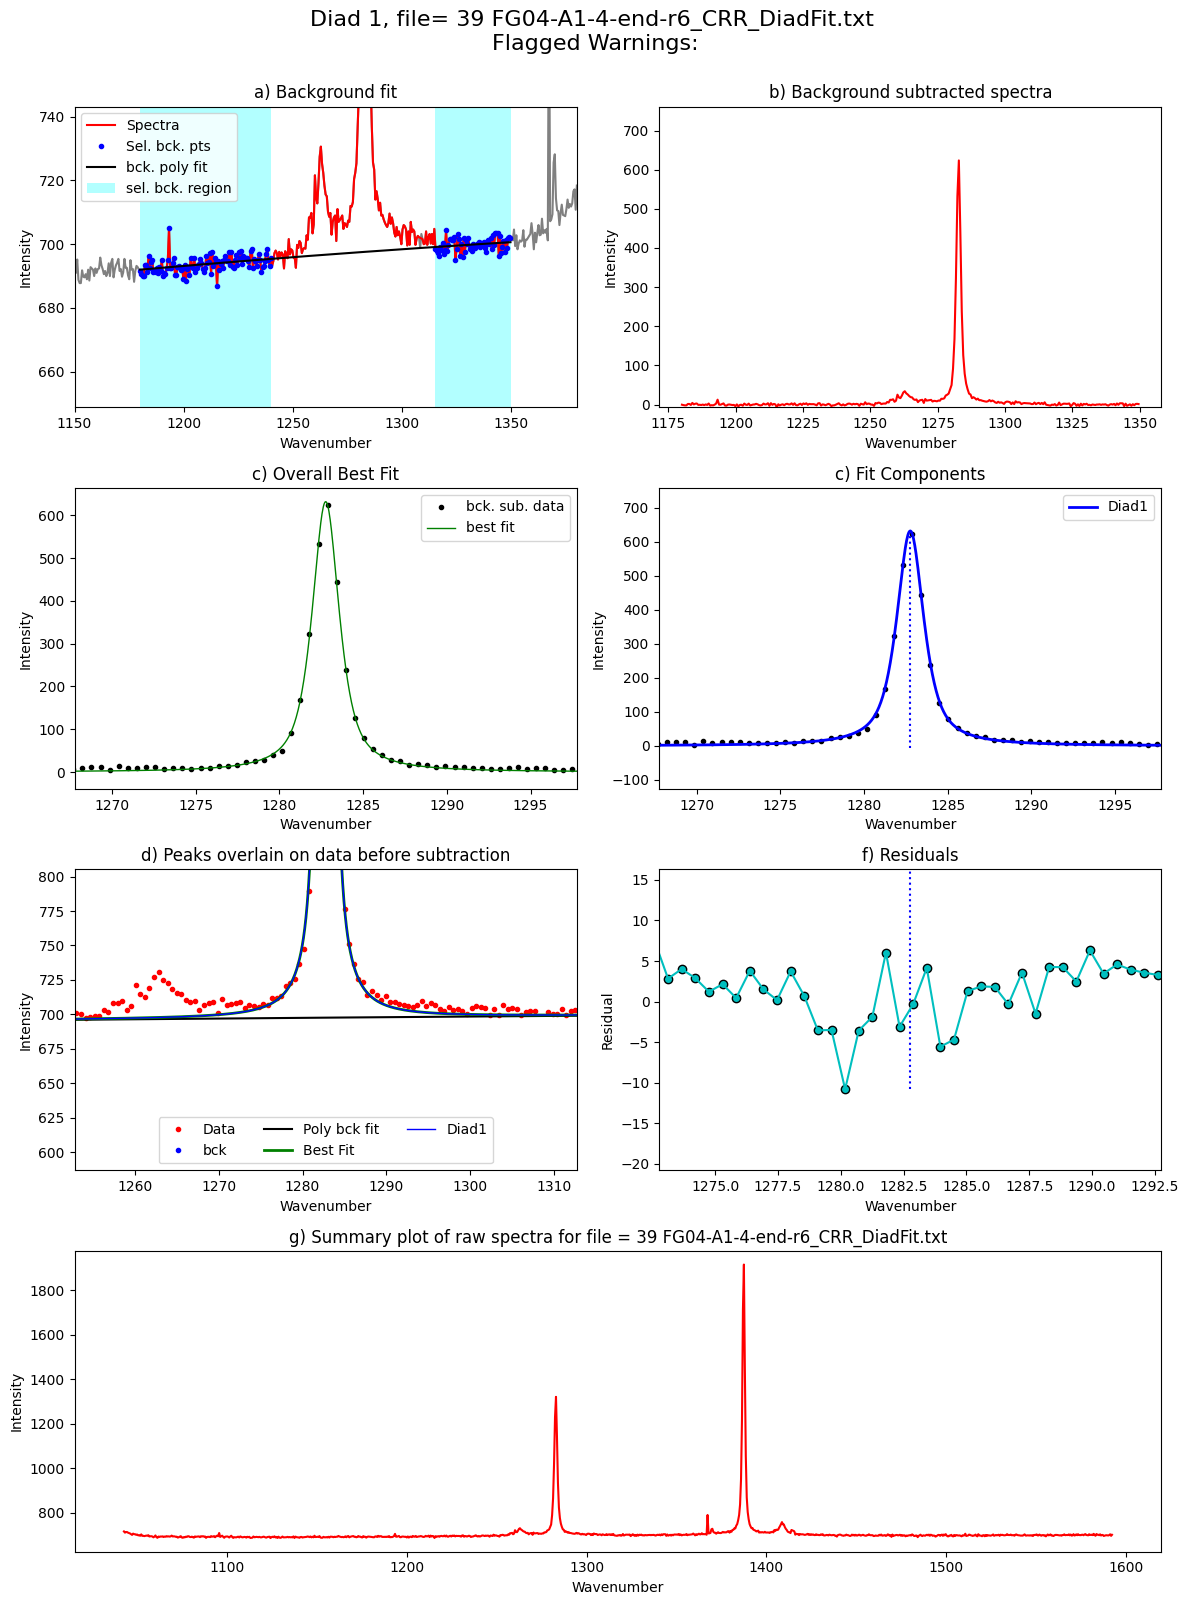

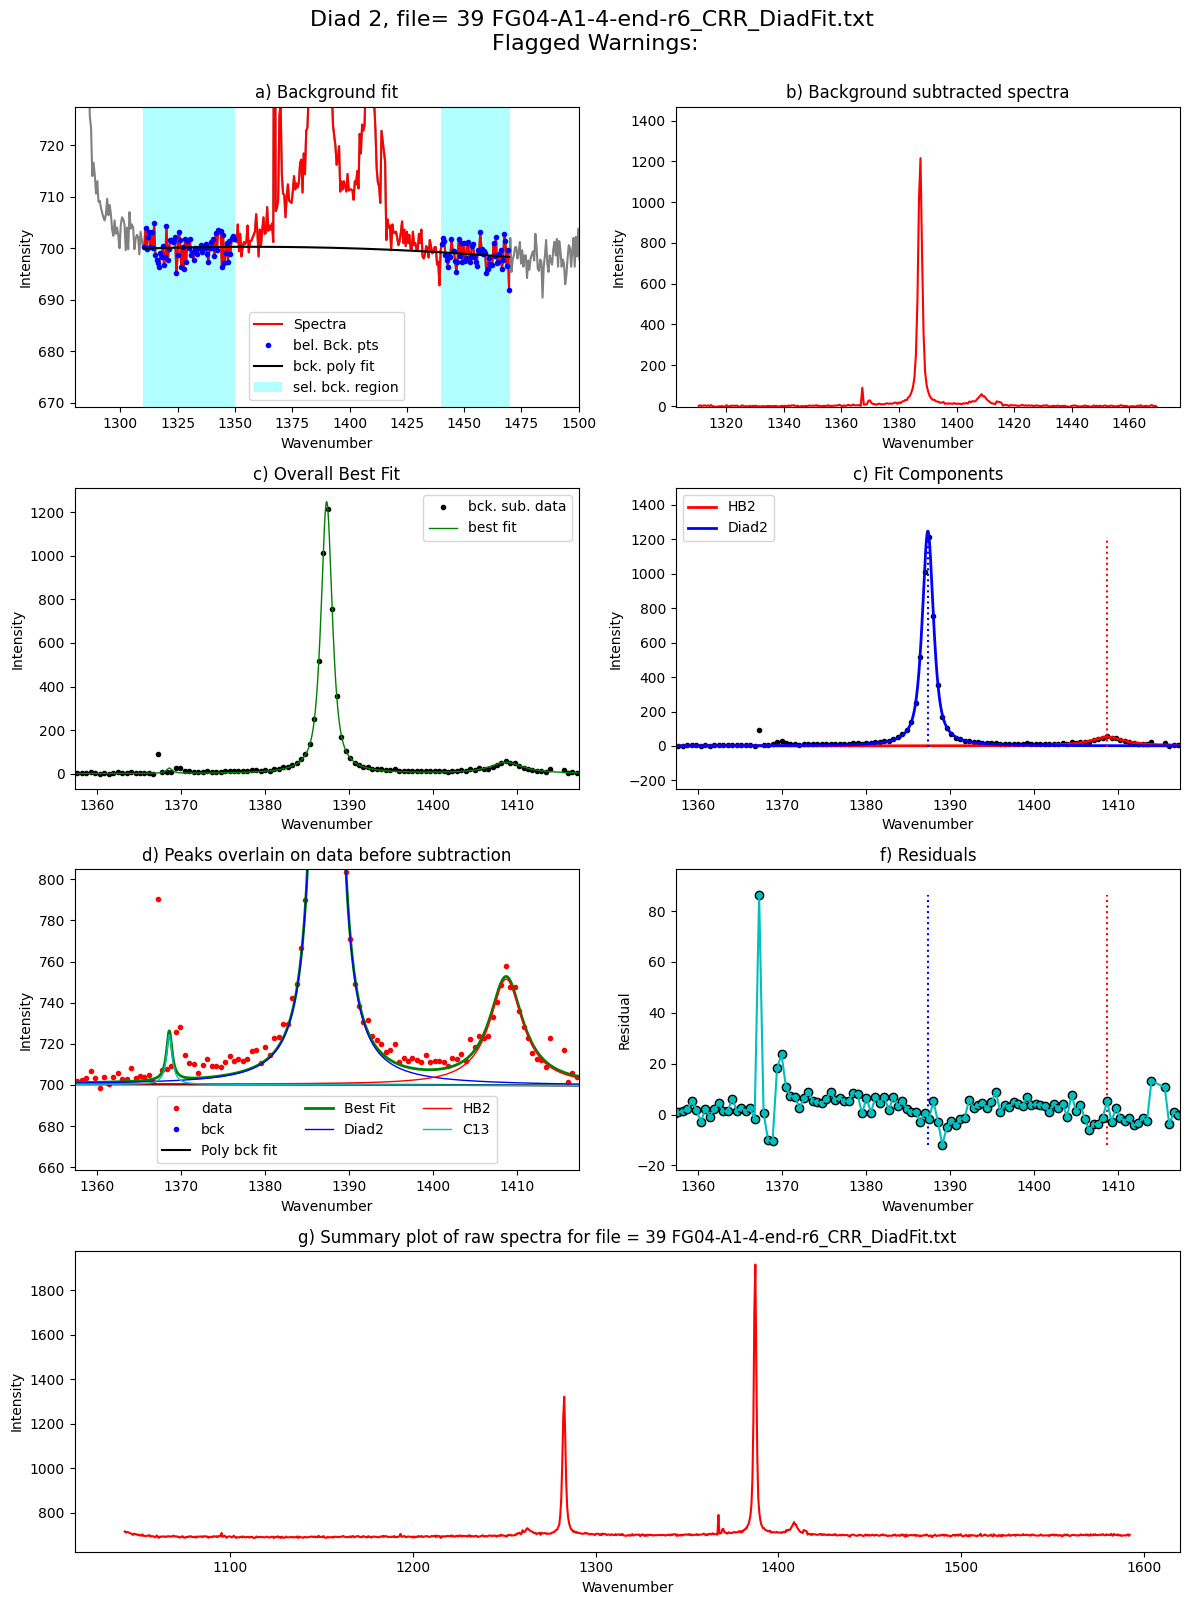

In [43]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [44]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [45]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0  FG04-A1-4-start-r1_CRR_DiadFit  104.561137  0.007904          1282.815147   
1              FG04-A1-4-start-r2  104.556833  0.007744          1282.802828   
2              FG04-A1-4-start-r3  104.558716  0.010517          1282.804856   
3    FG04-A1-4-end-r4_CRR_DiadFit  104.527895  0.009602          1282.873309   
4                FG04-A1-4-end-r5  104.534582  0.004799          1282.807412   
5    FG04-A1-4-end-r6_CRR_DiadFit  104.556583  0.007938          1282.764550   

   Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0        0.007575             475.015774       1282.815147       1350.295311   
1        0.007512             527.899297       1282.802828       1488.286033   
2        0.009116             313.139210       1282.804856        893.912406   
3        0.009262             412.933624       1282.873309       1265.758139   
4        0.004313             617.152312       1282.807462       1773.554056   
5        0.007059             632.173140       1282.764550       1782.751878   

   Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Asym50  Diad1_Asym70  \
0           0.974427        4.241224  ...      1.015517      1.026862   
1           0.981859        4.775873  ...      1.069027      1.014563   
2           0.980334        3.159498  ...      1.051903      1.019417   
3           1.049132        3.996101  ...      1.128205      1.186893   
4           1.014785        3.161400  ...      1.023529      1.007009   
5           0.970914        5.267721  ...      1.091892      1.071518   

  Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  Diad2_Asym50  Diad2_Asym70  \
0                  0.030241              0.004103      1.080435      1.072617   
1                  0.135549              0.003720      1.046414      1.029542   
2                  0.101765              0.006261      1.063425      1.062874   
3                  0.269008              0.005081      1.011905      1.016783   
4                  0.047755              0.003289      1.061702      1.026432   
5                  0.178438              0.003072      1.084599      1.050671   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad1_PDF_Model  \
0                   0.128860              0.001689  PseudoVoigtModel   
1                   0.074992              0.001529  PseudoVoigtModel   
2                   0.103277              0.002541  PseudoVoigtModel   
3                   0.020205              0.001973  PseudoVoigtModel   
4                   0.099666              0.001293  PseudoVoigtModel   
5                   0.135292              0.001281  PseudoVoigtModel   

    Diad2_PDF_Model  
0  PseudoVoigtModel  
1  PseudoVoigtModel  
2  PseudoVoigtModel  
3  PseudoVoigtModel  
4  PseudoVoigtModel  
5  PseudoVoigtModel  

[6 rows x 49 columns]

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [46]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()